<a href="https://colab.research.google.com/github/usmandankoly015/usmandankoly015/blob/main/3_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Scikit Learn: Linear Classifiers and the SVM

By: Michael Fairbank

Based loosely on the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

## Loading the 'iris' dataset

The dataset is loaded and prepared in the same way as we saw with the diabetes dataset:

1. Load the dataset.
2. Print the DESCR field to learn about the dataset.


In [1]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The IRIS data sets consists of 3 different types of irises: (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more information on this dataset.

## Target column
Append the target column into the dataframe, for convenience
- print the first 5 rows of the dataframe using "head"


In [2]:
df=iris.data
df["label"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualising the data


It's a bit difficult to visualise the iris input-feature space, since there are 4 features for each flower (and we can't plot in 4D).  As a compromise, the two plots below just visualise two features at a time.  The colour of each point plotted indicates the flower label. 



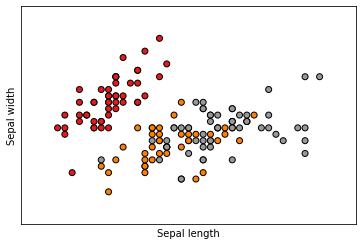

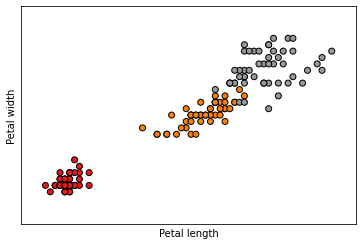

In [3]:
import matplotlib.pyplot as plt
X = df[["sepal length (cm)","sepal width (cm)"]].values  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
X = df[["petal length (cm)","petal width (cm)"]].values  # we only take the last two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


As we can see above, the iris dataset is pretty small - just 150 rows.

- There are 4 input features, and 1 data-label column.

- Unlike the previous example, which was a "regression" task, this task is a "classificatin task". 

- Each target is a discrete label.

### View the "labels"




In [5]:
print(iris.target.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Question

- By studying iris.target.values array above, how many different types of iris flowers are in this dataset?

## Shuffling the data and splitting into test and training sets

The data above is not shuffled.  Also, we shouldn't use *all* of our data to train a ML system - we should hold some back ("the test set" or "validation set") to see how well our ML system generalises on unseen (out-of-sample) data. 

We can do this using the sklearn.model_selection.train_test_split function, which shuffles and splits the data.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target.values, test_size=0.2)
print("Training data:",x_train.shape,y_train.shape)
print("Test data:",x_test.shape,y_test.shape)

Training data: (120, 5) (120,)
Test data: (30, 5) (30,)


#### Questions
- How many data samples are in our training and test sets, respectively?

Notice that the data is shuffled now...

In [7]:
y_test

array([2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2,
       2, 1, 1, 1, 1, 0, 2, 1])

## Train a Linear classifier

In the case of the iris dataset, the task is to predict, given an the flower's attributes (lengths etc), which iris type it represents. We are given samples of each of the 3 possible classes (the 3 types of iris flowers). These can be used to fit an estimator to predict the class an unseen example belongs to.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`. If you remember in the last lab we saw that the preprocessing classes had the methods `fit(X, y)` and `transform(T)`. We will see the differences later.

An example of an estimator is the class `klearn.linear_model.SGDClassifier` that implements a Linear Classifier, which we will use here.

In [8]:

from sklearn.linear_model import SGDClassifier
linear_clf=SGDClassifier(max_iter=1000, tol=0.01)

We call our estimator instance `linear_clf`, as it is a classifier. **It now must be fitted to the model, that is, it must learn from the data**. This is done by passing our training set to the `fit` method. Note that we only show the *training data* to the classifer - the *test* dataset is kept secret from it for now.

In [9]:
linear_clf.fit(x_train, y_train)

SGDClassifier(tol=0.01)

Now you can predict new values. In particular, we can ask to the classifier to recognise all of the data in our test dataset of iris flowers, which we have not used to train the classifier:

In [ ]:
print(linear_clf.predict(x_test))
print(y_test)

## Performance metrics for classifiers

What percentage of the above "predictions" are correct?  This is what we call "accuracy".

We can use the sklearn.metrics.accuracy_score to work out the accuracy...

In [10]:
from sklearn.metrics import accuracy_score
acc_test=accuracy_score(y_true=y_test, y_pred=linear_clf.predict(x_test))
acc_train=accuracy_score(y_true=y_train, y_pred=linear_clf.predict(x_train))
print("test set accuracy",acc_test)
print("train set accuracy",acc_train)

test set accuracy 1.0
train set accuracy 0.9916666666666667


### Confusion matrix

A confusion tells you how many of each actual category are classified correctly or misclassified as other categories:

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred=linear_clf.predict(x_test))
print(cm)

### Precision and recall metrics

See https://en.wikipedia.org/wiki/Precision_and_recall for details

In [11]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred=linear_clf.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Train a Support Vector Machine (SVM) classifier

Now we will try the same exercise again using a support-vector machine (SVM)

You can see that the code below is almos exactly the same as it was for the linear classifier - we just replace `SGDClassifier` by `sklearn.svm.SVC`.

The class `sklearn.svm.SVC` implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [33]:
from sklearn import svm
svm_clf = svm.SVC(gamma=0.0001, C=1000)


We now call our estimator instance `svm_clf`. As before, **It now must be fitted to the model, that is, it must learn from the data**. This is done by passing our training set to the `fit` method. Note that we only show the *training data* to the classifer - the *test* dataset is kept secret from it for now.

In [34]:
svm_clf.fit(x_train, y_train)

SVC(C=1000, gamma=0.0001)

Now you can predict new values. In particular, we can ask to the classifier to recognise all of the data in our test dataset of iris flowers, which we have not used to train the classifier:

In [35]:
print(svm_clf.predict(x_test))
print(y_test)

[2 0 2 0 2 0 0 1 2 0 0 0 1 2 2 2 1 0 2 0 1 2 2 1 1 1 1 0 2 1]
[2 0 2 0 2 0 0 1 2 0 0 0 1 2 2 2 1 0 2 0 1 2 2 1 1 1 1 0 2 1]


What percentage of the above "predictions" are correct?  This is what we call "accuracy".

We can use the sklearn.metrics.accuracy_score to work out the accuracy...

In [36]:
from sklearn.metrics import accuracy_score
acc_test=accuracy_score(y_true=y_test, y_pred=svm_clf.predict(x_test))
acc_train=accuracy_score(y_true=y_train, y_pred=svm_clf.predict(x_train))
print("test set accuracy",acc_test)
print("train set accuracy",acc_train)

test set accuracy 1.0
train set accuracy 1.0


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred=svm_clf.predict(x_test))
print(cm)

[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


In [24]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred=svm_clf.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exporing SVM hyper-parameters.

When we created our SVM classifer with `svm.SVC(gamma=0.0001, C=10.)`, we observe that it has two hyper parameters, $C=10$  and $gamma=0.0001$.  These are two "hyper-parameters" of the SVM machine learning algorithm.  They affect the way the algorithm behaves.

Remember from the lectures, $C$ specifies how much flexibility the model has in solving the task.  $gamma$ has a similar function.  We will concentrate on exploring the possible values of $C$ only below.



### Exercise 1 - Manual hyper-parameter search

- See if you can find a better value of $C$ than 10.  Try $C=1,10,100,1000$ in turn.  Note you'd have to re-run the above 4 code blocks in sequence with each different C$ value to do this.

- Plot a graph with C on the x-axis, and y-axis showing accuracy.  Do it for 2 curves, the test accuracy and the train accuracy.  

- Some starter code to deal with plotting graphs is given to help you.

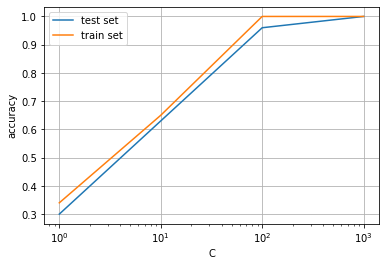

In [37]:
c_list=[1,10,100,1000]
test_accuracy_list=[0.3,0.63,0.96,1.0] # TODO update these to be your observed values
train_accuracy_list=[0.34,0.65,1.0,1.0] # TODO update these to be your observed values
plt.plot(c_list, test_accuracy_list, label="test set")
plt.plot(c_list, train_accuracy_list, label="train set")
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()


### Exercise 2 - Automation of the search for hyper-parameters

Try and automate the production of the above graph using a loop.  Put your code that does everthing (including plotting the graph below).

In [39]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [41]:
#from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe
import numpy as np

# Download the data and split into training and test sets

iris = load_iris()

X = iris.data
y = iris.target

test_size = int(0.2 * len(y))
np.random.seed(13)
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test = X[indices[-test_size:]]
y_test = y[indices[-test_size:]]


if __name__ == "__main__":
    # Instantiate a HyperoptEstimator with the search space and number of evaluations
    estim = HyperoptEstimator(classifier=any_classifier("my_clf"),
                              preprocessing=any_preprocessing("my_pre"),
                              algo=tpe.suggest,
                              max_evals=100,
                              trial_timeout=120)
    
    # Search the hyperparameter space based on the data
    estim.fit(X_train, y_train)
    
    # Show the results
    print(estim.score(X_test, y_test))
    # 1.0
    
    print(estim.best_model())
    # {'learner': ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
    #           max_depth=3, max_features='log2', max_leaf_nodes=None,
    #           min_impurity_decrease=0.0, min_impurity_split=None,
    #           min_samples_leaf=1, min_samples_split=2,
    #           min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
    #           oob_score=False, random_state=1, verbose=False,
    #           warm_start=False), 'preprocs': (), 'ex_preprocs': ()}


NameError: ignored

### Exercise 3

Each time you evaluate a new C, reshuffle the datasets and slplit into test+training sets.  Then for each C, calculate the average accuracy over 4 trials.  Plot your resulting graph below.  